In [1]:
from pyntcloud import PyntCloud
from pyntcloud.io import bin as io_bin
import numpy as np
import pandas as pd
import os

from pythreejs import *
import numpy as np
from IPython.display import display
from ipywidgets import HTML, Text, Output, VBox
from traitlets import link, dlink
import cv2

In [2]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import numpy as np

In [221]:
import glob
cwd = os.getcwd()
depth_files = glob.glob(os.path.join(cwd, "depth_images", "*"))
keypoint_files = glob.glob(os.path.join(cwd, "keypoint_images", "*"))
color_files = glob.glob(os.path.join(cwd, "color_images", "*"))
mask_files = glob.glob(os.path.join(cwd, "mask_images", "*"))
depth_value_files = glob.glob(os.path.join(cwd, "depth_values", "*"))
keypoint_files_dict = glob.glob(os.path.join(cwd, "keypoint", "*"))
depth_image = np.load(depth_files[10])
keypoint_image = np.load(keypoint_files[10])
color_image = np.load(color_files[10])
mask_image = np.load(mask_files[10])
depth_value = np.load(depth_value_files[10])
keypoint = np.load(keypoint_files_dict[10], allow_pickle=True)

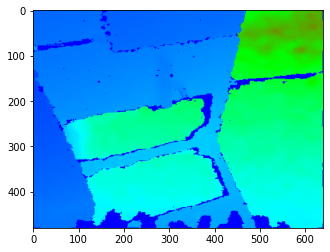

In [68]:
plt.imshow(depth_image)

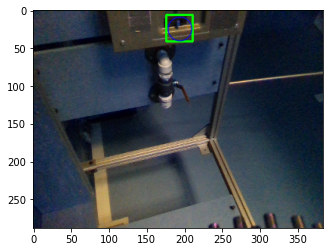

In [66]:
plt.imshow(keypoint_image)

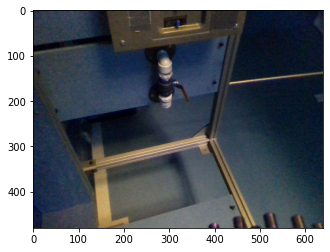

In [69]:
plt.imshow(color_image)

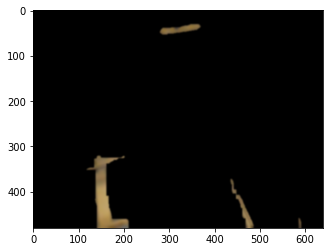

In [70]:
plt.imshow(mask_image)

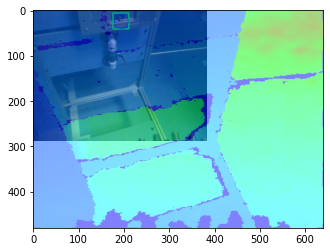

In [71]:
plt.imshow(keypoint_image, interpolation=None)
plt.imshow(depth_image,'jet', interpolation=None, alpha=0.5)

In [72]:
resized_keypoint = cv2.resize(keypoint_image, None, fx=1.66, fy=1.66, interpolation = cv2.INTER_CUBIC)

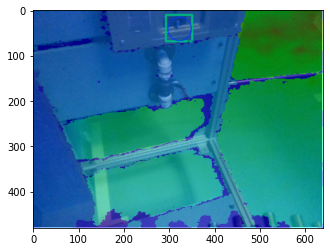

In [73]:
plt.imshow(resized_keypoint, interpolation=None)
plt.imshow(depth_image,'jet', interpolation=None, alpha=0.5)


In [231]:
depth_value.shape
X = np.arange(depth_value.shape[0])
Y = np.arange(depth_value.shape[1])
Z = depth_value

In [232]:
x, y = np.meshgrid(X,Y)

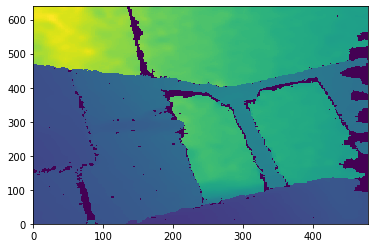

In [51]:
plt.pcolor(x, y, Z.transpose())

In [233]:
xx, yy = np.meshgrid(Y,X)
zz = depth_value

In [234]:
xx = xx.flatten()
yy = yy.flatten()
zz = zz.flatten()
concat_points = np.concatenate([[xx, yy, zz]], axis=1).transpose()

In [235]:
r = color_image[:,:, 0].flatten()
g = color_image[:,:, 1].flatten()
b = color_image[:,:, 2].flatten()
concat_rgb = np.concatenate([[r, g, b]], axis=1).transpose()

In [236]:
new_pts = pd.DataFrame(concat_points, columns=['x', 'y', 'z'])
new_pts["red"]  = 0
new_pts["green"]  = 0
new_pts["blue"]  = 0
new_pts[["red","green", "blue"]] = concat_rgb

cloud = PyntCloud(new_pts)
cloud.plot(initial_point_size=0.02)

Renderer(camera=PerspectiveCamera(aspect=1.6, fov=90.0, position=(319.5, 718.5, 352.3901595052083), quaternion…

In [79]:
data = keypoint.item()
data

{'right': (211, 41),
 'radius': 17.655841827392578,
 'center': (194, 24),
 'left': (176, 6)}

In [137]:
center= (np.array(data['center'])*1.666).tolist()
radius = data["radius"]*2*1.66

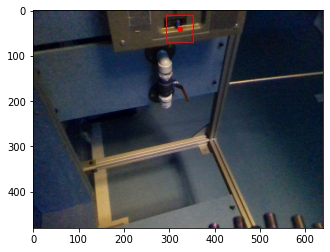

In [138]:
import matplotlib.patches as patches
fig, ax = plt.subplots(1)
ax.imshow(color_image)
ax.scatter(center[0], center[1], s=20, color="red")
rect = patches.Rectangle( np.array(center)-radius/2, radius, radius,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)

In [215]:
tlx, tly = np.array(center)-radius/2
brx, bry = np.array(center)+radius/2

In [216]:
xpatch = np.arange(min(int(tlx), int(brx)), max(int(tlx), int(brx)))
ypatch = np.arange(min(int(tly), int(bry)), max(int(tly), int(bry)))

In [222]:
xx, yy = np.meshgrid(xpatch,ypatch)
zz = depth_value[min(int(tlx), int(brx)): max(int(tlx), int(brx)) , min(int(tly), int(bry)):max(int(tly), int(bry))]
xx = xx.flatten()
yy = yy.flatten()
zz = zz.flatten()
concat_points = np.concatenate([[xx, yy, zz]], axis=1).transpose()

In [223]:
color_image_patch = color_image.transpose(1,0,2)
color_image_patch = color_image_patch[min(int(tlx), int(brx)): max(int(tlx), int(brx)) , min(int(tly), int(bry)):max(int(tly), int(bry)), :]
r = color_image_patch[:,:, 0].flatten()
g = color_image_patch[:,:, 1].flatten()
b = color_image_patch[:,:, 2].flatten()
concat_rgb = np.concatenate([[r, g, b]], axis=1).transpose()

In [224]:
new_pts = pd.DataFrame(concat_points, columns=['x', 'y', 'z'])
new_pts["red"]  = 0
new_pts["green"]  = 0
new_pts["blue"]  = 0
new_pts[["red","green", "blue"]] = concat_rgb#np.repeat([[255,0, 0]], len(concat_points), axis=0)

cloud = PyntCloud(new_pts)
cloud.plot(initial_point_size=0.02)

Renderer(camera=PerspectiveCamera(aspect=1.6, fov=90.0, position=(322.0, 107.0, 96.49669635162309), quaternion…

In [227]:
depth_value[int(center[0]) , int(center[1])]

36

In [229]:
np.unique(zz)

array([34, 35, 36, 37, 38, 39, 40], dtype=uint8)

In [230]:
mask_image

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [239]:
color_patch = color_image[min(int(tlx), int(brx)): max(int(tlx), int(brx)) , min(int(tly), int(bry)):max(int(tly), int(bry)), :] 

In [240]:
color_image_cp = color_image.transpose(1,0,2)
color_image_cp[min(int(tlx), int(brx)): max(int(tlx), int(brx)) , min(int(tly), int(bry)):max(int(tly), int(bry)), :] = np.repeat([[255,0, 0]], len(color_patch), axis=0)

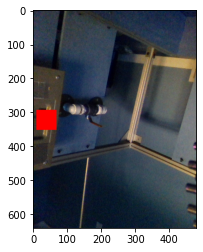

In [244]:
plt.imshow(color_image_cp)

In [242]:
depth_value.shape
X = np.arange(depth_value.shape[0])
Y = np.arange(depth_value.shape[1])
Z = depth_value

xx, yy = np.meshgrid(Y,X)
zz = depth_value

xx = xx.flatten()
yy = yy.flatten()
zz = zz.flatten()
concat_points = np.concatenate([[xx, yy, zz]], axis=1).transpose()

r = color_image_cp[:,:, 0].flatten()
g = color_image_cp[:,:, 1].flatten()
b = color_image_cp[:,:, 2].flatten()
concat_rgb = np.concatenate([[r, g, b]], axis=1).transpose()

In [243]:
new_pts = pd.DataFrame(concat_points, columns=['x', 'y', 'z'])
new_pts["red"]  = 0
new_pts["green"]  = 0
new_pts["blue"]  = 0
new_pts[["red","green", "blue"]] = concat_rgb

cloud = PyntCloud(new_pts)
cloud.plot(initial_point_size=0.02)

Renderer(camera=PerspectiveCamera(aspect=1.6, fov=90.0, position=(319.5, 718.5, 352.3901595052083), quaternion…